# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Taller Bosques Aleatorios

Usando el dataset heart.csv desarrollar un sistema de predicción que permita determinar si un paciente tiene una enfermedad cardíaca.

El data set tiene las siguientes variables independientes:

* age (edad)
* sex (sexo)
* chest pain type (tipo de dolor en el pecho)
* resting blood pressure (presión arterial en reposo)
* serum cholestoral in mg/dl (colesterol)
* fasting blood sugar > 120 mg/dl (nivel de azucar en sangre en ayunas)
* resting electrocardiographic results (values 0,1,2) (electrocardiograma en reposo)
* maximum heart rate achieved (frecuencia cardíaca máxima)
* exercise induced angina (angina provocada por ejercicio)
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment (depresión del ST inducida por el ejercicio respecto al reposo)
* number of major vessels (0-3) colored by flourosopy (número de vasos principales coloreados)
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (talasemia detectada)

La variable dependiente o target es:

* Enfermedad cardíaca (valor = 0 NO, valor = 1 SI)

Realizar el ajuste del modelo, usando el 80% de los datos en el entrenamiento y el 20% para test, además obtener el accuracy general del sistema de predicción.

Guarde el modelo con extensión .h5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/heart.csv")

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
data.count()

,0
age,1025
sex,1025
cp,1025
trestbps,1025
chol,1025
fbs,1025
restecg,1025
thalach,1025
exang,1025
oldpeak,1025


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


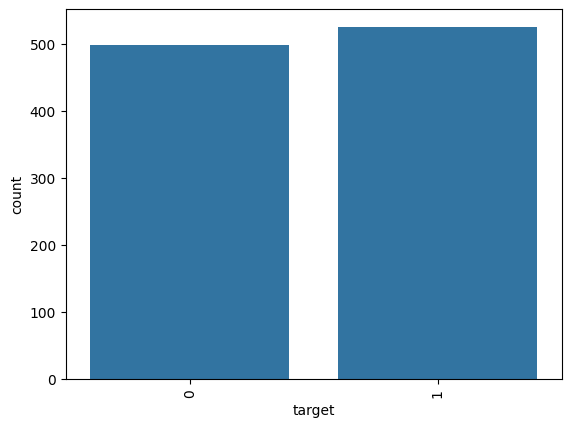

In [ ]:
sns.countplot(x='target',data=data)
plt.xticks(x=data['target'],rotation='vertical')
plt.show()

In [ ]:
data[data['target']==1].count()

,0
age,526
sex,526
cp,526
trestbps,526
chol,526
fbs,526
restecg,526
thalach,526
exang,526
oldpeak,526


In [ ]:
#remuestrar y colocar todos los valores iguales  teniendo en cuenta que el menor valor ess  10342
from sklearn.utils import resample
import pandas as pd

data2 = pd.DataFrame()

n_samples = 526

for i in range(2):  # 0 y 1 como valores de target
    df_aux = data[data.target == i]  # Filtrar por cada valor de 'target'
    df_aux = resample(df_aux, n_samples=n_samples, random_state=12)

    data2 = pd.concat([data2, df_aux])


print(data2['target'].value_counts())


target
0    526
1    526
Name: count, dtype: int64


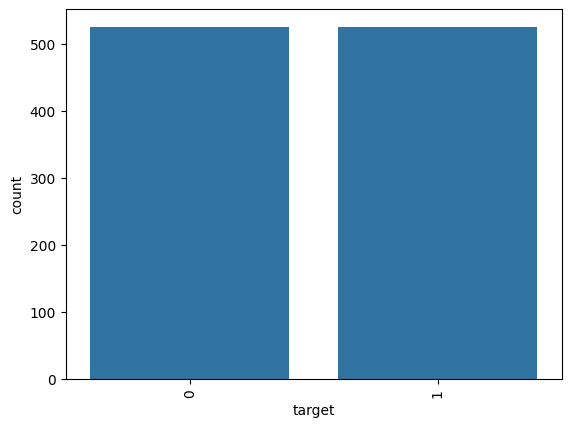

In [ ]:
sns.countplot(x='target',data=data2)
plt.xticks(x=data['target'],rotation='vertical')
plt.show()

In [ ]:
x = data2.drop('target', axis=1)
y = data2['target']
x=np.array(x)
y=np.array(y)
print('x-shape:',x.shape)
print('y-shape:',y.shape)

x-shape: (1052, 13)
y-shape: (1052,)


In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train-shape:',xtrain.shape)
print('x_test-shape:',xtest.shape)
print('y_train-shape:',ytrain.shape)
print('y_test-shape:',ytest.shape)

x_train-shape: (841, 13)
x_test-shape: (211, 13)
y_train-shape: (841,)
y_test-shape: (211,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown='ignore')
enc.fit(np.asarray(ytrain).reshape(-1,1))
y_train=enc.transform(np.asarray(ytrain).reshape(-1,1)).toarray()
y_test=enc.transform(np.asarray(ytest).reshape(-1,1)).toarray()
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model=Sequential()
model.add(Dense(256,input_shape=(xtrain.shape[1],),activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(2,activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,242 (508.76 KB)

 Trainable params: 130,242 (508.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adagrad',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(xtrain,y_train,epochs=80, validation_split=0.1,batch_size=32, verbose=1)

Epoch 1/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9204 - loss: 0.1714 - val_accuracy: 0.9294 - val_loss: 0.1748
Epoch 2/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9325 - loss: 0.1406 - val_accuracy: 0.9294 - val_loss: 0.1654
Epoch 3/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9442 - loss: 0.1308 - val_accuracy: 0.9294 - val_loss: 0.1615
Epoch 4/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9522 - loss: 0.1159 - val_accuracy: 0.9294 - val_loss: 0.1702
Epoch 5/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9632 - loss: 0.1041 - val_accuracy: 0.9294 - val_loss: 0.1730
Epoch 6/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9513 - loss: 0.1161 - val_accuracy: 0.9294 - val_loss: 0.1655
Epoch 7/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9522 - loss: 0.1244 - val_accuracy: 0.9294 - val_loss: 0.1619
Epoch 8/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9452 - loss: 0.1229 - val_accuracy: 0.9294 - val_loss

In [ ]:
model.save('model6.h5')

ValueError: Unable to synchronously create dataset (name already exists)

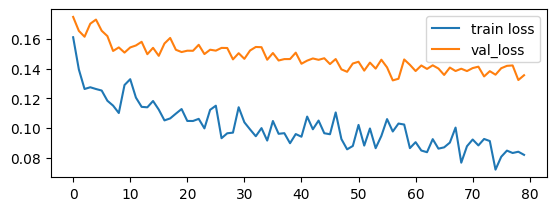

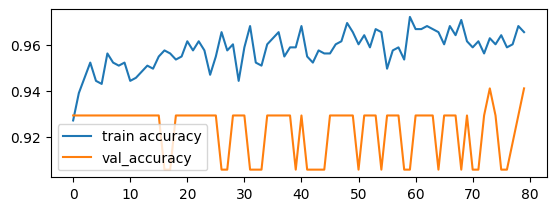

In [ ]:
# Grafifcar el loss y loss de validacion para verificar que no haya overfitting
#curva de error
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss','val_loss'])
plt.show()
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train accuracy','val_accuracy'])

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
[0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1
 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1
 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0
 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       109
           1       0.97      0.98      0.98       102

    accuracy                           0.98       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.98      0.98      0.98       211



Text(0.5, 1.0, 'Confusion Matrix')

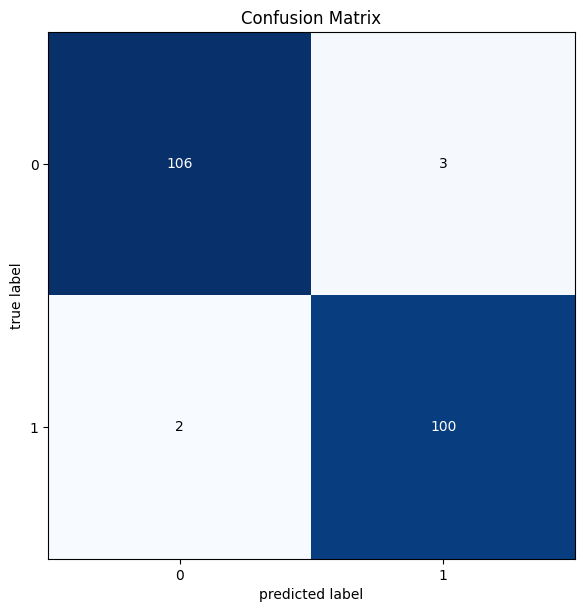

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

ypred=model.predict(xtest)
print(ytest)
matriz=confusion_matrix(ytest,np.argmax(ypred,axis=1))

plot_confusion_matrix(conf_mat=matriz,figsize=(6,6), show_normed=False)
plt.tight_layout()
print(metrics.classification_report(ytest,np.argmax(ypred,axis=1)))

plt.title('Confusion Matrix')

In [ ]:
print(ytest)

[0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1
 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1
 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0
 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1]
